Q8.Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all the overall ratings for each season and using plots compare the ratings for all the
    seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('ques-5.csv')

In [24]:
df.head(1)

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


#### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [20]:
q1 = df.groupby(['season'])['average_rating'].sum().to_frame().reset_index()

In [21]:
q1

,season,average_rating
0,1,80.9
1,2,80.0
2,3,62.2
3,4,60.3


<AxesSubplot:xlabel='season', ylabel='average_rating'>

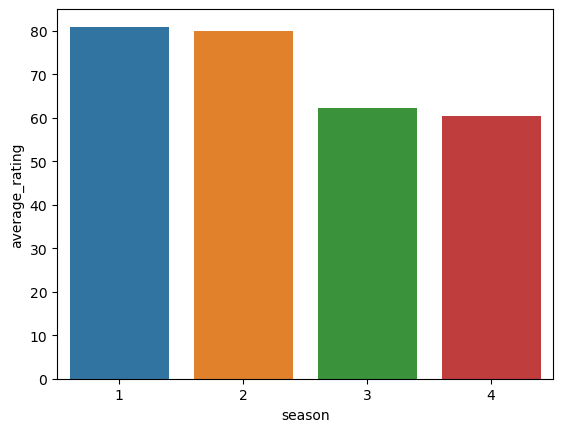

In [22]:
import seaborn as sns

sns.barplot(x='season',y='average_rating',data=q1)

### Get all the episode names, whose average rating is more than 8 for every season

In [26]:
df.head(2)

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [30]:
q2=df[df['average_rating']>8.0]

#### For Season1

In [38]:
s1 = q2[q2['season']==1]['name'].values

In [41]:
print(f'The names of episodes with more than 8 ratings in season 1 are {" and ".join(s1)}')

The names of episodes with more than 8 ratings in season 1 are Trompe L'Oeil and The Well-Tempered Clavier and The Bicameral Mind


#### For season2

In [42]:
s2 = q2[q2['season']==2]['name'].values

In [43]:
print(f'The names of episodes with more than 8 ratings in season 2 are {" and ".join(s2)}')

The names of episodes with more than 8 ratings in season 2 are Kiksuya and Vanishing Point and The Passenger


### Get all the episode names that aired before May 2019

In [49]:
df['airdate'][1]

'2016-10-09'

In [61]:
df[(df['airdate'].apply(lambda i: int(i[0:4]))<=2019) & (df['airdate'].apply(lambda i: int(i[5:7]))<=5)]

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
10,1214222,https://www.tvmaze.com/episodes/1214222/westwo...,Journey Into Night,2,1,regular,2018-04-22,09:00 PM,74.0,7.8,"In the aftermath of the host rebellion, the re...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
11,1440915,https://www.tvmaze.com/episodes/1440915/westwo...,Reunion,2,2,regular,2018-04-29,09:00 PM,60.0,7.7,Dolores looks for allies sympathetic to her ca...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
12,1440916,https://www.tvmaze.com/episodes/1440916/westwo...,Virtù e Fortuna,2,3,regular,2018-05-06,09:00 PM,60.0,7.7,While Delores makes a deal with the Confederad...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
13,1440917,https://www.tvmaze.com/episodes/1440917/westwo...,The Riddle of the Sphinx,2,4,regular,2018-05-13,09:00 PM,71.0,8.0,William pays his recuperating father-in-law se...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
14,1446362,https://www.tvmaze.com/episodes/1446362/westwo...,Akane No Mai,2,5,regular,2018-05-20,09:00 PM,60.0,7.6,While Maeve and her people explore Shogun Worl...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
15,1453278,https://www.tvmaze.com/episodes/1453278/westwo...,Phase Space,2,6,regular,2018-05-27,09:00 PM,60.0,7.7,"Maeve finds her daughter, Delores finds the ""r...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### Get the episode name from each season with the highest and lowest rating

In [74]:
# highest rating episode name as per season
df.loc[df.groupby('season')['average_rating'].idxmax(),['season','name']]

,season,name
9,1,The Bicameral Mind
17,2,Kiksuya
20,3,Parce Domine
32,4,Zhuangzi


In [75]:
# lowest rating episode name as per season
df.loc[df.groupby('season')['average_rating'].idxmin(),['season','name']]

,season,name
2,1,The Stray
14,2,Akane No Mai
25,3,Decoherence
28,4,The Auguries


### Get the summary for the most popular ( ratings ) episode in every season

In [76]:
df.loc[df.groupby('season')['average_rating'].idxmax(),['season','summary']]

,season,summary
9,1,Delores finds out the truth about William's fa...
17,2,Another of Westworld's Host revolutionaries is...
20,3,"If you're stuck in a loop, try walking in a st..."
32,4,God is bored.
